In [1]:
import pandas as pd
from math import floor
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
import warnings
warnings.filterwarnings('ignore')

# I- All data in independant mode without lvl 3

In [2]:
# df = pd.read_excel('dataset_boucle_retour_to_use.xlsx')  #is stored in INERIS drive
# del df['Unnamed: 0']
# df = df[['id_mzml', 'id_molecule', 'source', 'retention_time_exp', 'retention_time', 'rt_diff', 
#        'tic', 'mass_exp', 'mass', 'cosine_similarity_20', 'scholle_similarity_20',
#        'cosine_similarity_40', 'scholle_similarity_40', 'root_similarity_20', 'root_similarity_40', 
#        'cosine_similarity_isotopic_mod', 'num_isotopic_exp_peaks', 'num_isotopic_the_peaks', 
#        'acquisition_mode', 'niveau_de_confiance']]
# df['found_peaks_isotopic'] = df['num_isotopic_exp_peaks'].apply(lambda x : 0 if x==1 else 1)
# df['niveau_de_confiance_1'] = df['niveau_de_confiance'].map({'1': 1, '2A': 1, '2B': 1, '3': 1, '0': 0, 0:0, 1:1, 2:1, 3:1})

In [3]:
# df1 = df[(df['acquisition_mode']=='Data independant') & (df['niveau_de_confiance']!='3')]
# def sampling_k_elements(group, k=610):
#     if len(group) < k:
#         return group
#     return group.sample(k)

# df1 = df1.groupby('niveau_de_confiance_1').apply(sampling_k_elements).reset_index(drop=True)
df1 = pd.read_csv('all_data_in_independant_mode_without_lvl_3.csv')

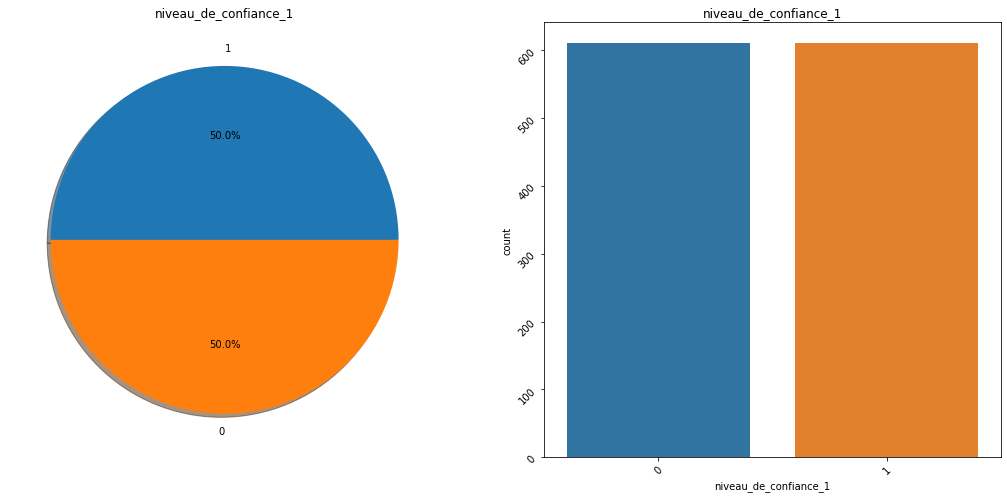

In [4]:
col = "niveau_de_confiance_1"
f,ax=plt.subplots(1,2,figsize=(18,8))
df1[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
sns.countplot(col,data=df1,ax=ax[1])
ax[1].set_title(col)
ax[1].tick_params(labelrotation=45)
plt.show()

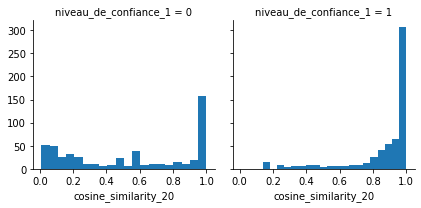

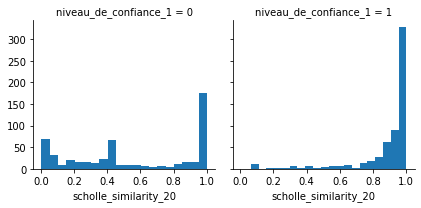

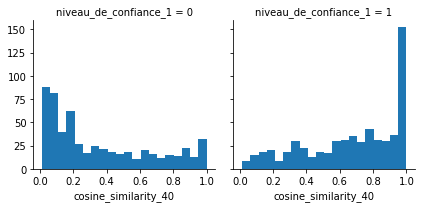

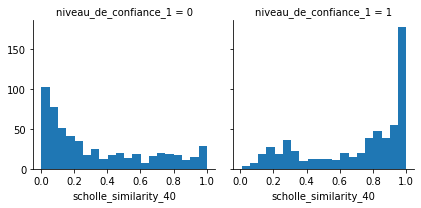

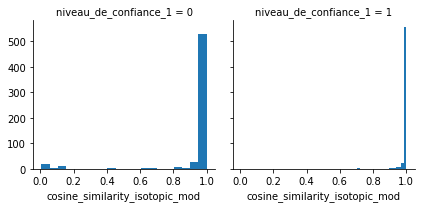

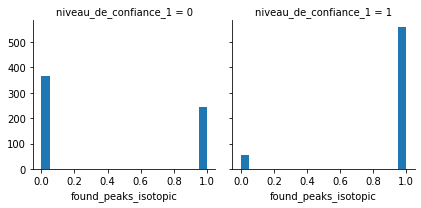

In [5]:
X1 = [
    'cosine_similarity_20', 
    'scholle_similarity_20', 
    'cosine_similarity_40',
    'scholle_similarity_40', 
    'cosine_similarity_isotopic_mod', 'found_peaks_isotopic']
for i in X1:
    g = sns.FacetGrid(df1, col='niveau_de_confiance_1')
    g.map(plt.hist, i, bins=20)

In [6]:
X = df1[X1]

y = df1['niveau_de_confiance_1']

In [7]:
for c in X1:
    no_missing = df1[c].isnull().sum()
    if no_missing > 0:
        print(c)
        print(no_missing)
    else:
        print(c)
        print("No missing values")
        print(' ')

cosine_similarity_20
83
scholle_similarity_20
83
cosine_similarity_40
46
scholle_similarity_40
46
cosine_similarity_isotopic_mod
No missing values
 
found_peaks_isotopic
No missing values
 


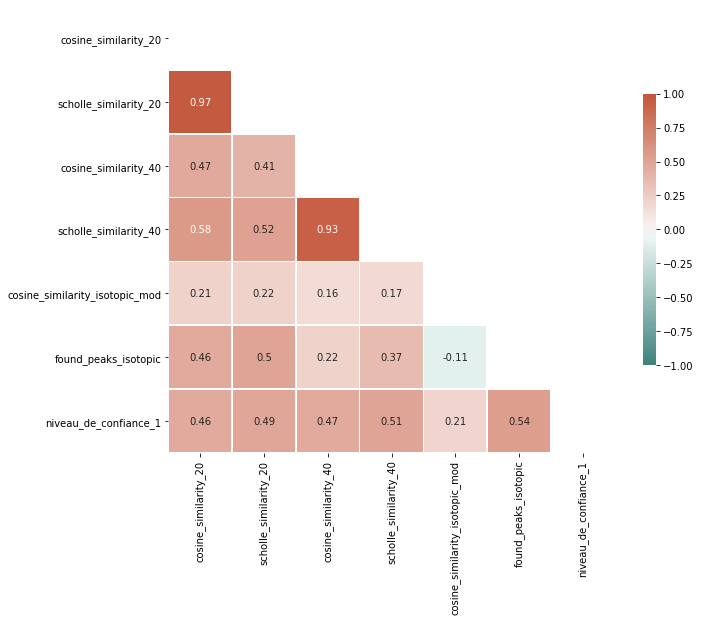

In [8]:
correlation = df1[X1+['niveau_de_confiance_1']].corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [9]:
X = X.fillna(0)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=11)

In [11]:
import numpy as np
unique, counts = np.unique(y_test.values, return_counts=True)
dict(zip(unique, counts))
# len(y_test.values)

{0: 183, 1: 183}

In [12]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()

decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()

SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()

LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()

QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()

random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()

KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()

bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()

models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score
5,Random Forest,0.366550,0.037189,0.910958,0.913764,0.911074,0.910796
1,Decision Tree,0.008929,0.007065,0.896867,0.899602,0.897148,0.896700
6,K-Nearest Neighbors,0.012412,0.020797,0.871122,0.873853,0.871152,0.870858
2,Support Vector Machine,0.069417,0.007950,0.833570,0.837551,0.833804,0.832661
0,Logistic Regression,0.018776,0.007936,0.817155,0.822893,0.817359,0.816269
4,Quadratic Discriminant Analysis,0.006454,0.010049,0.806689,0.814510,0.806838,0.805415
3,Linear Discriminant Analysis,0.010478,0.007379,0.801956,0.813330,0.802104,0.799991
7,Bayes,0.006586,0.008087,0.789083,0.803052,0.789341,0.786179


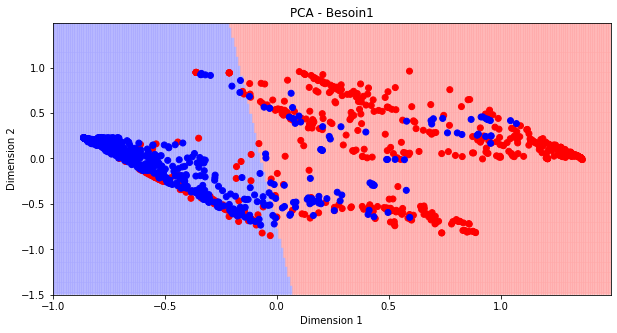

In [13]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np


h = .01
x_min, x_max = -1,1.5
y_min, y_max = -1.5,1.5


X, y = X, y
# selecting first 2 components of PCA
X_pca = PCA().fit_transform(X)
X_selected = X_pca[:,:2]
# training classifier and evaluating on the whole plane
clf = LogisticRegression()
clf.fit(X_selected,y)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plotting
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure(figsize=(10,5))
plt.pcolormesh(xx, yy, Z, alpha=.6,cmap=cmap_light)
plt.title('PCA - Besoin1')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap=cmap_bold)
plt.show()

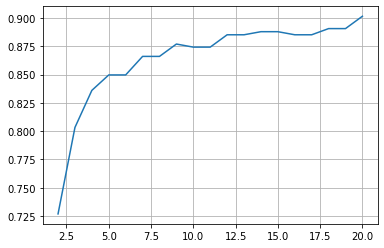

In [14]:
acc=[]
for i in range(2,21):
    model=DecisionTreeClassifier(max_leaf_nodes=i, random_state=9)
    model.fit(X_train,y_train)
    prediction4=model.predict(X_test)
    acc.append(metrics.accuracy_score(prediction4,y_test))
plt.plot(range(2,21), acc)
plt.grid()

In [15]:
DTC=DecisionTreeClassifier(max_leaf_nodes=5, random_state=9)
DTC.fit(X_train,y_train)
prediction4=DTC.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,y_test))

The accuracy of the Decision Tree is 0.8497267759562842


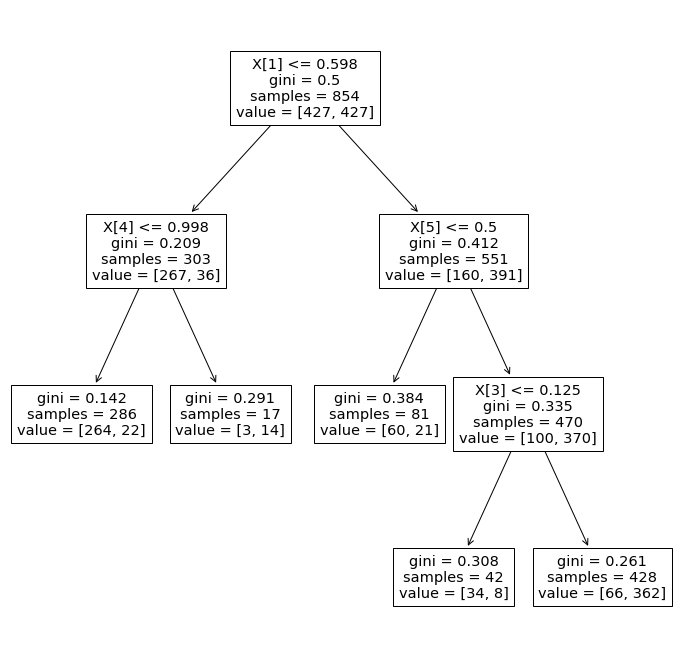

In [16]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(12, 12))
_=tree.plot_tree(DTC
#                  , feature_names=X_train.columns
                )

In [17]:
LR_no_rt=LogisticRegression(random_state=9)
LR_no_rt.fit(X_train,y_train)
prediction4=LR_no_rt.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,y_test))

The accuracy of the Decision Tree is 0.8005464480874317


In [18]:
# Calculate the confusion matrix itself
confusion = metrics.confusion_matrix(y_test, prediction4)
print(f"Confusion matrix:\n{confusion}")


# Normalizing by the true label counts to get rates
print(f"\nNormalized confusion matrix:")
for row in confusion:
    print(row / row.sum())

Confusion matrix:
[[133  50]
 [ 23 160]]

Normalized confusion matrix:
[0.72677596 0.27322404]
[0.12568306 0.87431694]


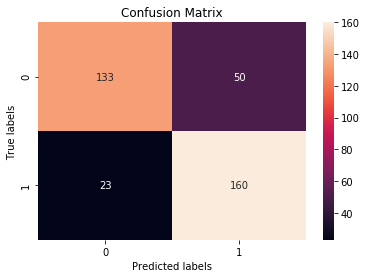

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [20]:
coefficient = pd.DataFrame({
    X_train.columns[0]  : [LR_no_rt.coef_[0][0]],
    X_train.columns[1]  : [LR_no_rt.coef_[0][1]],
    X_train.columns[2]  : [LR_no_rt.coef_[0][2]],
    X_train.columns[3]  : [LR_no_rt.coef_[0][3]],
    X_train.columns[4]  : [LR_no_rt.coef_[0][4]],
    X_train.columns[5]  : [LR_no_rt.coef_[0][5]],
    }, columns = X_train.columns)
coefficient

,cosine_similarity_20,scholle_similarity_20,cosine_similarity_40,scholle_similarity_40,cosine_similarity_isotopic_mod,found_peaks_isotopic
0,-0.518057,2.073825,2.952015,-0.339205,2.372462,2.181804


In [21]:
# df1.to_csv('all_data_in_independant_mode_without_lvl_3.csv', index=False)

# II- INERIS data in indepndant mode without lvl 3

In [22]:
# df = pd.read_excel('dataset_boucle_retour_to_use.xlsx')   #is stored in INERIS drive
# del df['Unnamed: 0']
# df = df[['id_mzml', 'id_molecule', 'source', 'retention_time_exp', 'retention_time', 'rt_diff', 
#        'tic', 'mass_exp', 'mass', 'cosine_similarity_20', 'scholle_similarity_20',
#        'cosine_similarity_40', 'scholle_similarity_40', 'root_similarity_20', 'root_similarity_40', 
#        'cosine_similarity_isotopic_mod', 'num_isotopic_exp_peaks', 'num_isotopic_the_peaks', 
#        'acquisition_mode', 'niveau_de_confiance']]
# df['found_peaks_isotopic'] = df['num_isotopic_exp_peaks'].apply(lambda x : 0 if x==1 else 1)
# df['niveau_de_confiance_1'] = df['niveau_de_confiance'].map({'1': 1, '2A': 1, '2B': 1, '3': 1, '0': 0, 0:0, 1:1, 2:1, 3:1})

In [23]:
# df1 = df[(df['source']=='INERIS')&(df['acquisition_mode']=='Data independant')& (df['niveau_de_confiance']!='3')]
# df1['rt_diff_abs'] = df1['rt_diff'].apply(lambda x : abs(x))
# def sampling_k_elements(group, k=370):
#     if len(group) < k:
#         return group
#     return group.sample(k)

# df1 = df1.groupby('niveau_de_confiance_1').apply(sampling_k_elements).reset_index(drop=True)
df1 = pd.read_csv('INERIS_data_in_indepndant_mode_without_lvl_3.csv')

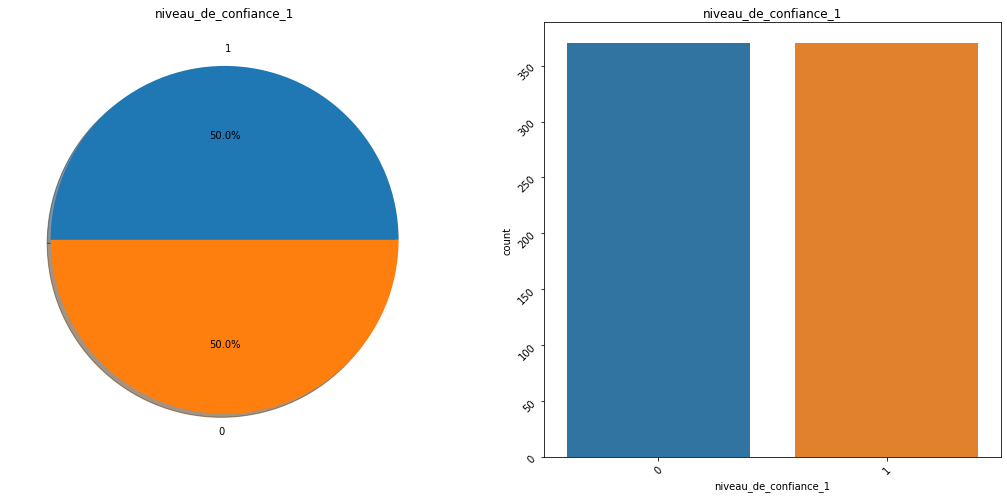

In [24]:
col = "niveau_de_confiance_1"
f,ax=plt.subplots(1,2,figsize=(18,8))
df1[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(col)
ax[0].set_ylabel('')
sns.countplot(col,data=df1,ax=ax[1])
ax[1].set_title(col)
ax[1].tick_params(labelrotation=45)
plt.show()

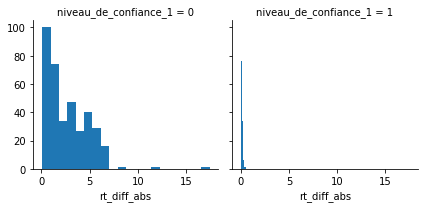

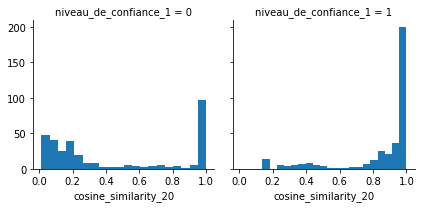

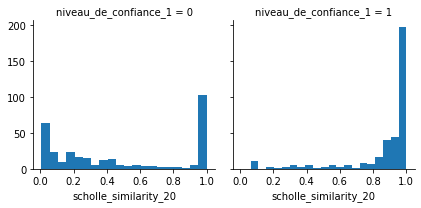

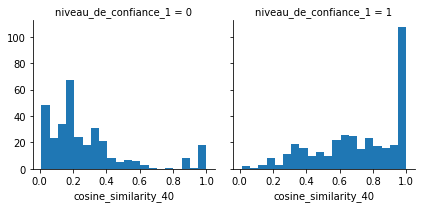

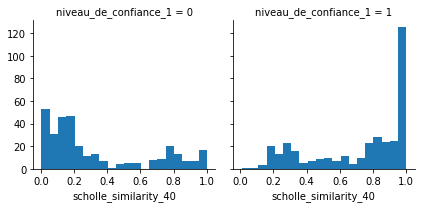

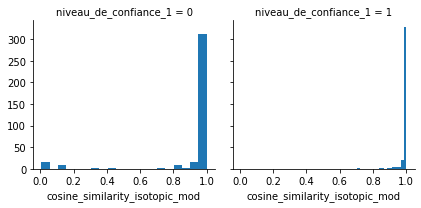

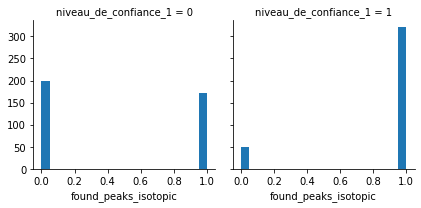

In [25]:
X1 = ['rt_diff_abs', 'cosine_similarity_20', 'scholle_similarity_20', 'cosine_similarity_40',
      'scholle_similarity_40', 'cosine_similarity_isotopic_mod', 'found_peaks_isotopic']
for i in X1:
    g = sns.FacetGrid(df1, col='niveau_de_confiance_1')
    g.map(plt.hist, i, bins=20)

In [26]:
X = df1[X1]

y = df1['niveau_de_confiance_1']

In [27]:
for c in X1:
    no_missing = df1[c].isnull().sum()
    if no_missing > 0:
        print(c)
        print(no_missing)
    else:
        print(c)
        print("No missing values")
        print(' ')

rt_diff_abs
No missing values
 
cosine_similarity_20
55
scholle_similarity_20
55
cosine_similarity_40
51
scholle_similarity_40
51
cosine_similarity_isotopic_mod
No missing values
 
found_peaks_isotopic
No missing values
 


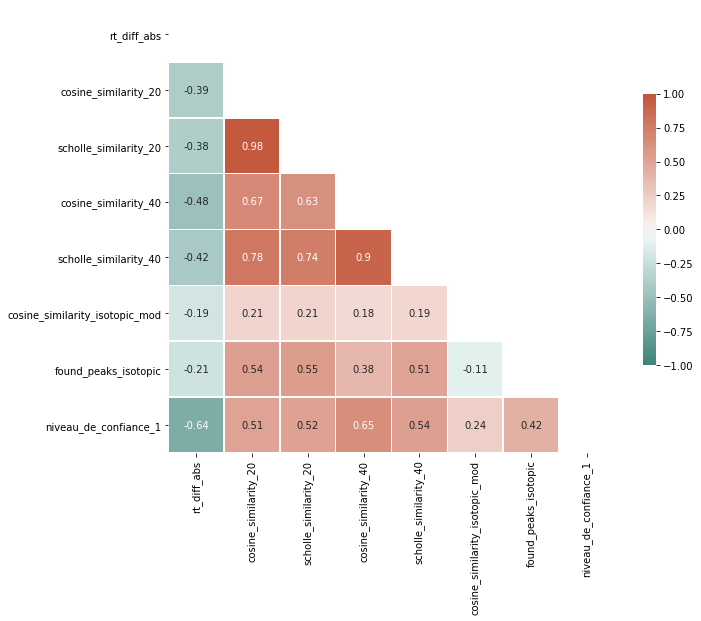

In [28]:
correlation = df1[X1+['niveau_de_confiance_1']].corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [29]:
X = X.fillna(0)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=3)

In [42]:
import numpy as np
unique, counts = np.unique(y_test.values, return_counts=True)
dict(zip(unique, counts))
len(y_train.values)

518

In [31]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()

decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()

SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()

LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()

QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()

random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()

KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()

bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()

models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score
5,Random Forest,0.324726,0.030378,0.965347,0.966728,0.965054,0.965296
4,Quadratic Discriminant Analysis,0.008564,0.008156,0.961425,0.963795,0.960994,0.961312
0,Logistic Regression,0.018897,0.011027,0.953808,0.959158,0.953066,0.953484
2,Support Vector Machine,0.019733,0.009340,0.953808,0.960903,0.952846,0.953399
1,Decision Tree,0.010815,0.008656,0.953771,0.955632,0.953510,0.953699
6,K-Nearest Neighbors,0.005651,0.013044,0.946116,0.954928,0.945000,0.945545
7,Bayes,0.007140,0.007359,0.934351,0.937782,0.935157,0.934185
3,Linear Discriminant Analysis,0.010990,0.009642,0.924811,0.928917,0.924048,0.924512


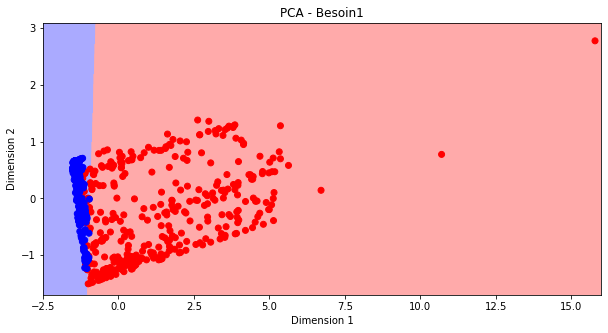

In [32]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np


h = .01
x_min, x_max = -2.5,16
y_min, y_max = -1.7,3.1


X, y = X, y
# selecting first 2 components of PCA
X_pca = PCA().fit_transform(X)
X_selected = X_pca[:,:2]
# training classifier and evaluating on the whole plane
clf = LogisticRegression()
clf.fit(X_selected,y)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plotting
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure(figsize=(10,5))
plt.pcolormesh(xx, yy, Z, alpha=.6,cmap=cmap_light)
plt.title('PCA - Besoin1')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap=cmap_bold)
plt.show()

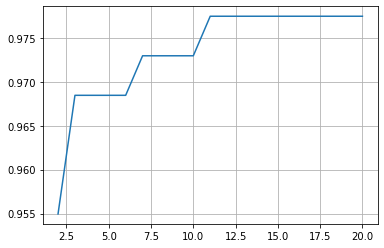

In [33]:
acc=[]
for i in range(2,21):
    model=DecisionTreeClassifier(max_leaf_nodes=i, random_state=10)
    model.fit(X_train,y_train)
    prediction4=model.predict(X_test)
    acc.append(metrics.accuracy_score(prediction4,y_test))
plt.plot(range(2,21), acc)
plt.grid()

In [34]:
DTC=DecisionTreeClassifier(max_leaf_nodes=4, random_state=10)
DTC.fit(X_train,y_train)
prediction4=DTC.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,y_test))

The accuracy of the Decision Tree is 0.9684684684684685


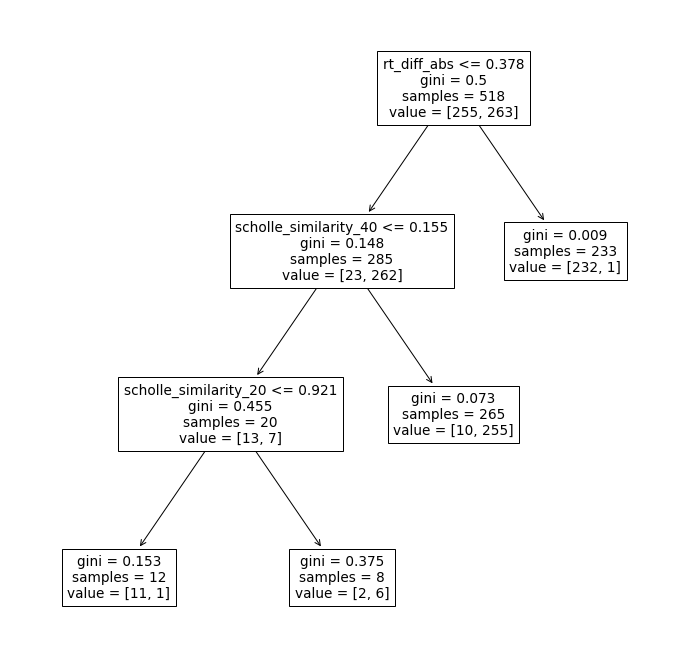

In [35]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(12, 12))
_=tree.plot_tree(DTC
                 , feature_names=X_train.columns
                )

In [36]:
LR_rt=LogisticRegression(random_state=11)
LR_rt.fit(X_train,y_train)
prediction4=LR_rt.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,y_test))

The accuracy of the Decision Tree is 0.9414414414414415


In [37]:
# Calculate the confusion matrix itself
confusion = metrics.confusion_matrix(y_test, prediction4)
print(f"Confusion matrix:\n{confusion}")


# Normalizing by the true label counts to get rates
print(f"\nNormalized confusion matrix:")
for row in confusion:
    print(row / row.sum())

Confusion matrix:
[[102  13]
 [  0 107]]

Normalized confusion matrix:
[0.88695652 0.11304348]
[0. 1.]


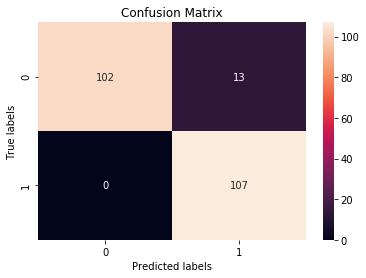

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [43]:
coefficient = pd.DataFrame({
    X_train.columns[0]  : [LR_rt.coef_[0][0]],
    X_train.columns[1]  : [LR_rt.coef_[0][1]],
    X_train.columns[2]  : [LR_rt.coef_[0][2]],
    X_train.columns[3]  : [LR_rt.coef_[0][3]],
    X_train.columns[4]  : [LR_rt.coef_[0][4]],
    X_train.columns[5]  : [LR_rt.coef_[0][5]],
    X_train.columns[6]  : [LR_rt.coef_[0][6]],
    }, columns = X_train.columns)
coefficient

,rt_diff_abs,cosine_similarity_20,scholle_similarity_20,cosine_similarity_40,scholle_similarity_40,cosine_similarity_isotopic_mod,found_peaks_isotopic
0,-5.058084,-0.172487,0.46653,1.998957,0.282589,1.620007,1.029666


In [40]:
# df1.to_csv('INERIS_data_in_indepndant_mode_without_lvl_3.csv', index=False)